In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
%matplotlib inline

In [ ]:
print(os.listdir('../input/bank-customer-churn-modeling'))
df= pd.read_csv('../input/bank-customer-churn-modeling/Churn_Modelling.csv')

['Churn_Modelling.csv']


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7917,7918,15590094,Nwachukwu,613,Germany,Male,38,9,126265.88,2,0,0,15859.95,0
5790,5791,15646351,Somerville,486,Spain,Male,27,7,0.00,2,1,0,28823.04,0
6933,6934,15679961,Davidson,708,Spain,Male,46,7,68799.72,1,1,1,39704.14,0
7401,7402,15677395,Nwabugwu,633,France,Female,39,9,129189.15,2,0,0,170998.83,0
1874,1875,15590268,Chu,529,Spain,Male,35,5,95772.97,1,1,1,112781.50,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
cat_cols=['Geography','Gender']
num_cols=[col for col in df.columns if col not in cat_cols]

In [ ]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df=pd.get_dummies(data=df, columns=['Geography'])

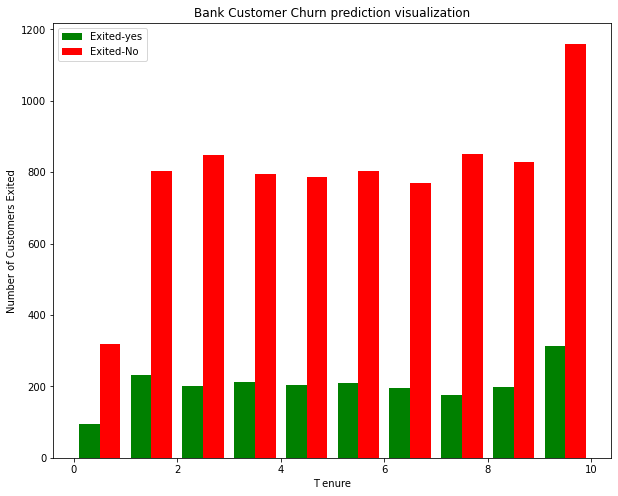

In [ ]:
tenure_exited_0=df[df.Exited==0].Tenure
tenure_exited_1=df[df.Exited==1].Tenure

plt.figure(figsize=(10,8))
plt.xlabel('T enure')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([tenure_exited_1,tenure_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

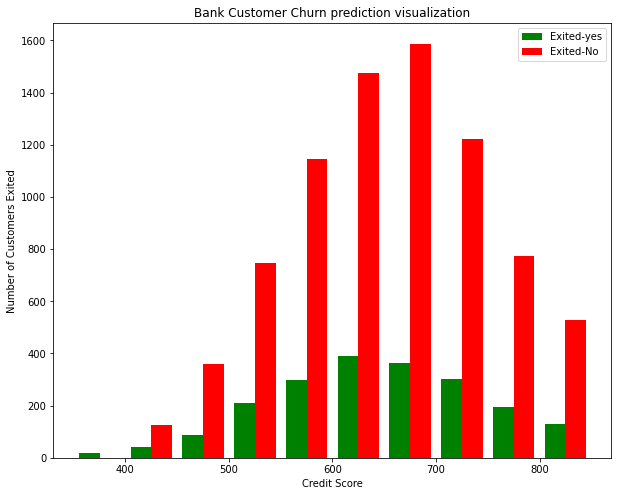

In [ ]:
creditscore_exited_0=df[df.Exited==0].CreditScore
creditscore_exited_1=df[df.Exited==1].CreditScore

plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([creditscore_exited_1,creditscore_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

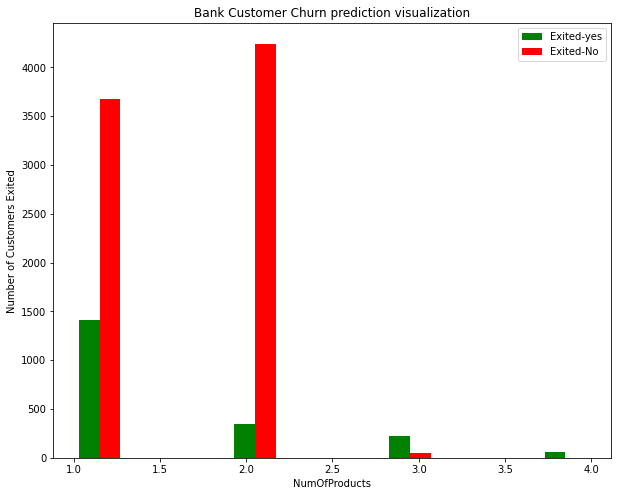

In [ ]:
NumOfProducts_exited_0=df[df.Exited==0].NumOfProducts
NumOfProducts_exited_1=df[df.Exited==1].NumOfProducts

plt.figure(figsize=(10,8))
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([NumOfProducts_exited_1,NumOfProducts_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

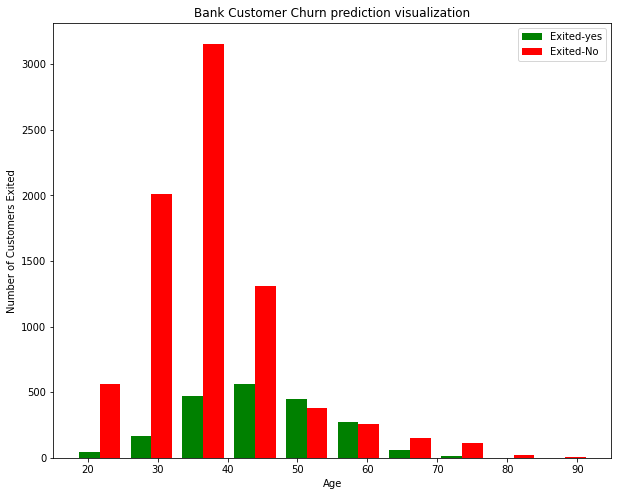

In [ ]:
Age_exited_0=df[df.Exited==0].Age
Age_exited_1=df[df.Exited==1].Age

plt.figure(figsize=(10,8))
plt.xlabel('Age')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([Age_exited_1,Age_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [ ]:
# Scaling
cols_to_scale=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary','Age']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [ ]:
# Training
x=df.drop('Exited',axis=1)
y=df.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [ ]:
def ANN(xtrain,xtest,ytrain,ytest,loss,weight):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    
    if weight==-1:
        model.fit(xtrain,ytrain,epochs=100)
    else:
        model.fit(xtrain,ytrain,epochs=100,class_weight=weight)
    print()
    print(model.evaluate(xtest,ytest))
    print()
    ypred= model.predict(xtest)
    ypred=np.round(ypred)
    print()
    print(classification_report(ytest,ypred))
        
    return ypred

In [ ]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

2022-11-07 10:54:19.770100: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-07 10:54:19.922639: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
235/235 [==============================] - 1s 1ms/step - loss: 0.5220 - accuracy: 0.7684
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.8021
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.8051
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8084
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8123
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8153
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8173
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8177
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8181
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4186 - accura

Text(69.0, 0.5, 'Truth')

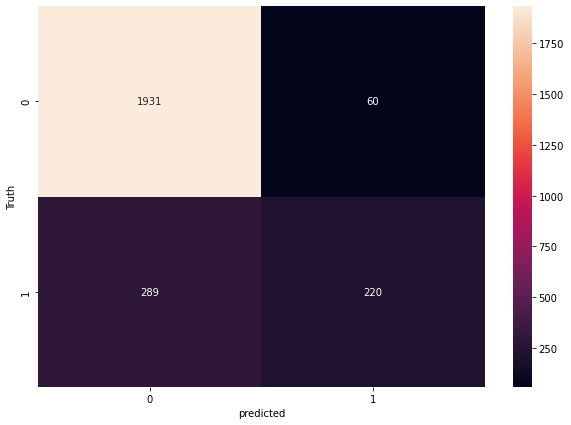

In [ ]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

# Handling Imbalanced Data
## 1. Under Sampling majority class

In [ ]:
count_class_0, count_class_1 = df.Exited.value_counts()

In [ ]:
df_class_0= df[df.Exited==0]
df_class_1= df[df.Exited==1]

In [ ]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1])

df_test_under.shape

(4074, 13)

In [ ]:
# Training
x=df_test_under.drop('Exited',axis=1)
y=df_test_under.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [ ]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
96/96 [==============================] - 1s 1ms/step - loss: 0.6656 - accuracy: 0.5921
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.6298
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6465
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6570
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.6622
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6079 - accuracy: 0.6789
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.6750
Epoch 8/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.6838
Epoch 9/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.6894
Epoch 10/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.6959
Epoch 11/

## Over sampling

In [ ]:
df_class_1_over= df_class_1.sample(count_class_0,replace=True)

df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

df_test_over.shape

(15926, 13)

In [ ]:
# Training
x=df_test_over.drop('Exited',axis=1)
y=df_test_over.Exited


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 1ms/step - loss: 0.6394 - accuracy: 0.6419
Epoch 2/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.6900
Epoch 3/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.6998
Epoch 4/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.7070
Epoch 5/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5607 - accuracy: 0.7143
Epoch 6/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7251
Epoch 7/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.7351
Epoch 8/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7432
Epoch 9/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7504
Epoch 10/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5076 - accura

## SMOTE

In [ ]:
x=df.drop('Exited',axis=1)
y=df.Exited

from imblearn.over_sampling import SMOTE

smote= SMOTE(sampling_strategy='minority')

x_sm,y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.25,random_state=15,stratify=y_sm)

ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 1ms/step - loss: 0.6536 - accuracy: 0.6232
Epoch 2/100
374/374 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.6638
Epoch 3/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.6875
Epoch 4/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.7086
Epoch 5/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7131
Epoch 6/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.7313
Epoch 7/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.7375
Epoch 8/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7461
Epoch 9/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.7517
Epoch 10/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4991 - accura